In [1]:
import pandas as pd
import warnings 

In [2]:
warnings.filterwarnings('ignore')

## Import dataset

In [3]:
column_names=['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep = '\t', names = column_names)

In [4]:
df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#no of unique users
df['user_id'].nunique()

943

In [6]:
#no of unique movies
df['movie_id'].nunique()

1682

In [7]:
movies_data=pd.read_csv('ml-100k/u.item', sep = '|',encoding='latin-1',header=None)
movies_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
movies_data=movies_data[[0,1]]
movies_data.columns=['movie_id','title']
movies_data.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### merging the datasets

In [9]:
df=pd.merge(df,movies_data,on='movie_id')

In [10]:
df.tail()

,user_id,movie_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory Data Analysis


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#sorting the movies based on their avg rating
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [13]:
#sorting the movies based on the nummber of ratings
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

#### creating a dataframe consisting of avg rating and number of ratings for a movie

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [15]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())

In [16]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


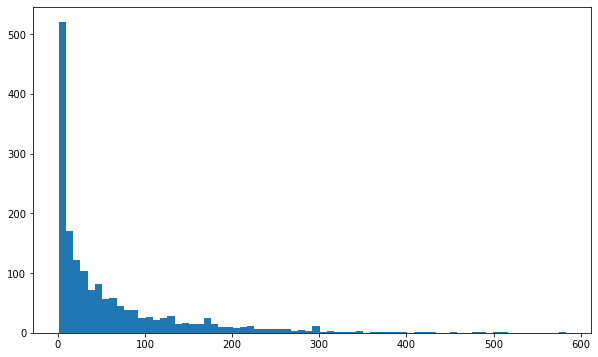

In [17]:
#The distribution of number of ratings using histogram
plt.figure(figsize = (10, 6))
plt.hist(ratings['num of ratings'], bins= 70)
plt.show()

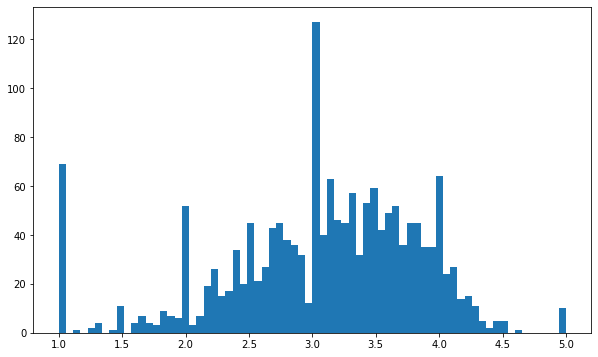

In [18]:
# Similarly as above to visualize the distribution of the avg ratings for various movies
plt.figure(figsize = (10, 6))
plt.hist(ratings['rating'], bins = 70)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='num of ratings'>

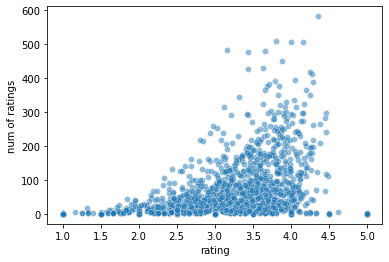

In [19]:
#visualizing the average rating vs number of ratings through a scatter plot
sns.scatterplot(x = 'rating', y = 'num of ratings', data = ratings, alpha = 0.5)

## Creating Movie Recomendation

In [20]:
# Creating Pivot table with user_id as indexes, movie_titles as columns and ratings as values
moviemat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [21]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [22]:
# Sorting ratings dataframe with respect to number of ratings 
ratings.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [23]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [24]:
# Finding correation or similarity of starwars with other movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [25]:
similar_to_starwars
#these vaues indicate the similarity between the user expreience when compared to starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [26]:
# converting above series into a dataframe
corr_starwars = pd.DataFrame(similar_to_starwars, columns = ['correlation'])

In [27]:
#removing nan values i.e users thosw who have not watched or rated star wars
corr_starwars = corr_starwars.dropna()

In [28]:
corr_starwars.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [29]:
corr_starwars.sort_values('correlation', ascending = False)
#The data that we get here is not very reliable because there are many movies with correlation of 1.0 but very few
#number of ratings.

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [30]:
# adding a column of num of ratings to the corr_starwars data frame
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [31]:
corr_starwars.sort_values('correlation',ascending=False)
#As we can see the num of rating are very low,So to get the best possible recommendation we set a threshold value i.e minimum
#num of ratings required to be considered for recommending a movie

,correlation,num of ratings
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,5
For Ever Mozart (1996),-1.0,3
American Dream (1990),-1.0,2


In [32]:
#In this project I have taken threshold to be 100 ratings
# filtering correlation values such that number of ratings are greater than 100 and 
#sorting them in descending order of correlation 
recommendations = corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation', ascending = False)

In [33]:
recommendations

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [34]:
# recommending top 5 movies for those who like star wars 1977
recommendations[1:6]

,correlation,num of ratings
title,,
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241


## Creating The Recommendation Function

In [35]:
#creating the recommend movie function bassed on above concept

def recommend_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns = ['correlation'])
    corr_movie = corr_movie.dropna()
    corr_movie.sort_values('correlation', ascending = False, inplace = True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    recommendations = corr_movie[corr_movie['num of ratings']>100].sort_values('correlation', ascending = False)
    return recommendations

In [36]:
# Recommendations on movies similar to titanic

In [37]:
predictions_on_titanic = recommend_movies('Titanic (1997)')

In [38]:
predictions_on_titanic.head()

,correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
